# Logistic Regression

Logistic regression is the classification algorithm which is used to predict the probability of a binary outcome based on a given set of independent variables.

In logistic regression, the model outputs probabilities, which are then used to classify data into one of the two binary classes.

Assumptions:
1. Linearity: The model assumes a linear relationship between the log odds of the dependent variable and the independent variables.
2. No Perfect Separation of classes
3. No Multicollinearity

In this context, we are looking at a problem where logistic regression is used to predict the likelihood of heart disease in a patient based on various independent variables such as age, cholesterol levels, blood pressure, etc. The outcome is binary: either the patient has heart disease (1) or does not have heart disease (0).



In [2]:
import pandas as pd
import matplotlib.pyplot as plt

heart_disease=pd.read_csv('D:\interview\Machine learning\Machine-Learning-Algorithms\Logistic Regression\heart_2022_no_nans.csv')
heart_disease.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [8]:
heart_disease.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [3]:
selected_columns=['AgeCategory', 'Sex', 'GeneralHealth', 
                    'PhysicalActivities', 'SmokerStatus', 'BMI', 
                    'HadHeartAttack', 'HadStroke', 'HadCOPD', 'HadDiabetes']

heart_data=heart_disease[selected_columns]
heart_data

,AgeCategory,Sex,GeneralHealth,PhysicalActivities,SmokerStatus,BMI,HadHeartAttack,HadStroke,HadCOPD,HadDiabetes
0,Age 65 to 69,Female,Very good,Yes,Former smoker,27.99,No,No,No,No
1,Age 70 to 74,Male,Very good,Yes,Former smoker,30.13,No,No,No,Yes
2,Age 75 to 79,Male,Very good,No,Former smoker,31.66,No,No,No,No
3,Age 80 or older,Female,Fair,Yes,Never smoked,31.32,No,No,No,No
4,Age 80 or older,Female,Good,Yes,Never smoked,33.07,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...
246017,Age 60 to 64,Male,Very good,Yes,Never smoked,32.28,No,No,No,No
246018,Age 25 to 29,Female,Fair,Yes,Never smoked,24.34,No,No,No,No
246019,Age 65 to 69,Male,Good,Yes,Never smoked,29.86,No,Yes,No,Yes
246020,Age 50 to 54,Female,Excellent,Yes,Never smoked,28.66,No,No,No,No


In [32]:
print(heart_data.isnull().sum())

AgeCategory           0
Sex                   0
GeneralHealth         0
PhysicalActivities    0
SmokerStatus          0
BMI                   0
HadHeartAttack        0
HadStroke             0
HadCOPD               0
HadDiabetes           0
dtype: int64


In [33]:
print(heart_data.dtypes)

AgeCategory            object
Sex                    object
GeneralHealth          object
PhysicalActivities     object
SmokerStatus           object
BMI                   float64
HadHeartAttack         object
HadStroke              object
HadCOPD                object
HadDiabetes            object
dtype: object


We should check if the target variable ('HadHeartAttack') is balanced. Logistic regression can be significantly affected by class imbalance, where one class dominates the other

In [34]:
print(heart_data['HadHeartAttack'].value_counts())

HadHeartAttack
No     232587
Yes     13435
Name: count, dtype: int64


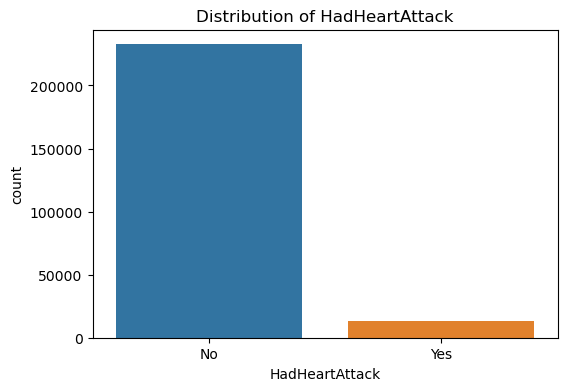

In [6]:
import seaborn as sns

# Target variable distribution
plt.figure(figsize=(6,4))
sns.countplot(x='HadHeartAttack', data=heart_data)
plt.title("Distribution of HadHeartAttack")
plt.show()

We can clearly see an imbalance in the target variable, with significantly more instances of one class compared to the other. Before applying logistic regression, it's essential to balance the data. In this analysis, we can use the Synthetic Minority Over-sampling Technique (SMOTE) to address this imbalance.

In [5]:
heart_data.head()

,AgeCategory,Sex,GeneralHealth,PhysicalActivities,SmokerStatus,BMI,HadHeartAttack,HadStroke,HadCOPD,HadDiabetes
0,Age 65 to 69,Female,Very good,Yes,Former smoker,27.99,No,No,No,No
1,Age 70 to 74,Male,Very good,Yes,Former smoker,30.13,No,No,No,Yes
2,Age 75 to 79,Male,Very good,No,Former smoker,31.66,No,No,No,No
3,Age 80 or older,Female,Fair,Yes,Never smoked,31.32,No,No,No,No
4,Age 80 or older,Female,Good,Yes,Never smoked,33.07,No,No,No,No


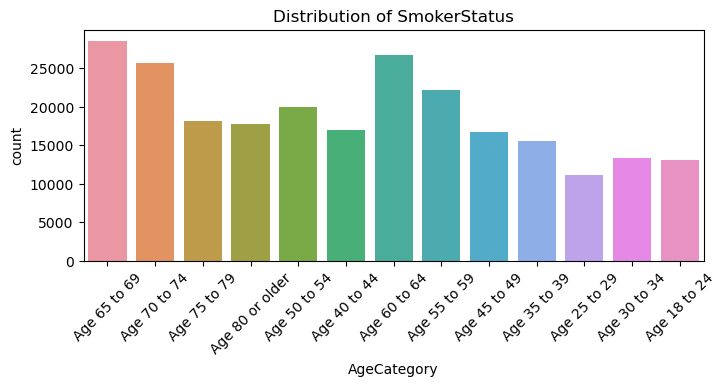

In [12]:
import seaborn as sns
plt.figure(figsize=(8,3))
sns.countplot(x='AgeCategory', data=heart_data)
plt.title(f"Distribution of {column}")
plt.xticks(rotation=45)
plt.show()

In [5]:
# Rename the categories in SmokerStatus
heart_data.loc[:, 'SmokerStatus'] = heart_data['SmokerStatus'].replace({
    'Current smoker - now smokes every day': 'Smokes daily',
    'Current smoker - now smokes some days': 'Smokes some days'
})

# Rename the categories in Had Diabetes
heart_data.loc[:, 'HadDiabetes'] = heart_data['HadDiabetes'].replace({
    'Yes, but only during pregnancy (female)': 'pregnancy Diabetes',
    'No, pre-diabetes or borderline diabetes': 'Pre-diabetes'
})

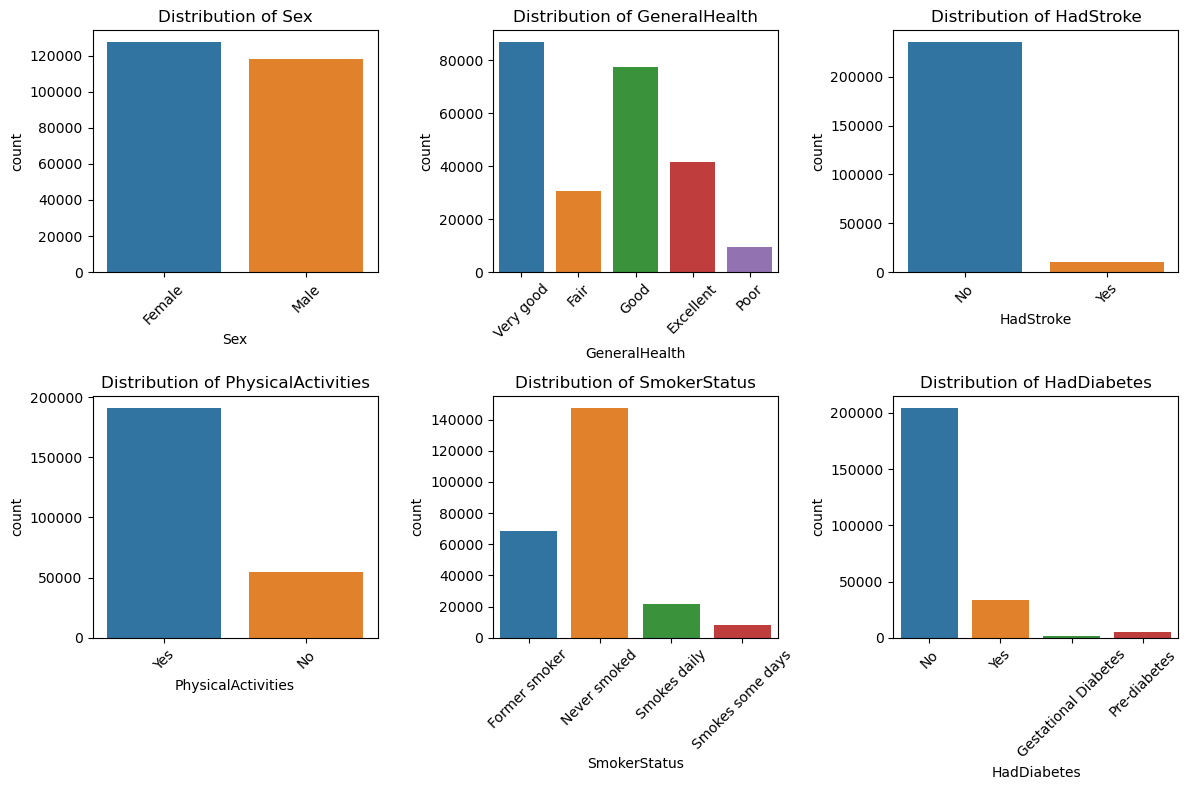

In [29]:
categorical_columns = ['Sex', 'GeneralHealth', 'HadStroke', 'PhysicalActivities','SmokerStatus','HadDiabetes']
fig, axes = plt.subplots(2, 3, figsize=(12, 8))  

for i, column in enumerate(categorical_columns):
    row = i // 3 
    col = i % 3   
    sns.countplot(x=column, data=heart_data, ax=axes[row, col])  
    axes[row, col].set_title(f"Distribution of {column}")  
    axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=45)  

plt.tight_layout()
plt.show()


- Balanced Sex Distribution: Since sex is relatively balanced in this dataset, there won't be a significant bias toward either gender.
- A significant number of individuals report being in "Very Good" or "Good" health. This may imply that a majority of the dataset has moderate heart disease risk unless other factors like age, cholesterol, and blood pressure are present.
- The fact that only a small number of people report having had a stroke may mean fewer individuals in the dataset have significant cardiovascular issues.
- The strong majority of individuals engaging in physical activities is a positive factor. Physical activity is protective against heart disease, so this population may have a lower overall risk.
- Most individuals have never smoked, indicating a healthier lifestyle. A significant portion of the population has quit smoking, which is beneficial for heart health.
- Most individuals do not have diabetes, suggesting lower immediate heart disease risk. A notable number have diabetes, including those with gestational diabetes and pre-diabetes, indicating higher cardiovascular risk.

In [30]:
heart_data.head()

,AgeCategory,Sex,GeneralHealth,PhysicalHealthDays,PhysicalActivities,SmokerStatus,BMI,HadHeartAttack,HadStroke,HadCOPD,HadDiabetes
0,Age 65 to 69,Female,Very good,4.0,Yes,Former smoker,27.99,No,No,No,No
1,Age 70 to 74,Male,Very good,0.0,Yes,Former smoker,30.13,No,No,No,Yes
2,Age 75 to 79,Male,Very good,0.0,No,Former smoker,31.66,No,No,No,No
3,Age 80 or older,Female,Fair,5.0,Yes,Never smoked,31.32,No,No,No,No
4,Age 80 or older,Female,Good,3.0,Yes,Never smoked,33.07,No,No,No,No


In [6]:
from sklearn.preprocessing import LabelEncoder
label_encoders={}
heart_data_encoded = heart_data.copy()
for column in ['AgeCategory', 'Sex', 'GeneralHealth', 'PhysicalActivities', 'SmokerStatus', 'HadHeartAttack','HadStroke','HadCOPD','HadDiabetes']:
    le = LabelEncoder()
    heart_data_encoded[column] = le.fit_transform(heart_data[column])
    label_encoders[column] = le
    

In [8]:
heart_data_encoded.head()

,AgeCategory,Sex,GeneralHealth,PhysicalActivities,SmokerStatus,BMI,HadHeartAttack,HadStroke,HadCOPD,HadDiabetes
0,9,0,4,1,0,27.99,0,0,0,0
1,10,1,4,1,0,30.13,0,0,0,2
2,11,1,4,0,0,31.66,0,0,0,0
3,12,0,1,1,1,31.32,0,0,0,0
4,12,0,2,1,1,33.07,0,0,0,0


In [7]:
from sklearn.model_selection import train_test_split


X=heart_data_encoded.drop('HadHeartAttack', axis=1)
y=heart_data_encoded['HadHeartAttack']


X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

logistic_model=LogisticRegression(max_iter=200)
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [9]:
predictions=logistic_model.predict(X_test)

In [10]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print("\nClassification Report:")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[46479    94]
 [ 2563    69]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     46573
           1       0.42      0.03      0.05      2632

    accuracy                           0.95     49205
   macro avg       0.69      0.51      0.51     49205
weighted avg       0.92      0.95      0.92     49205



The model's accuracy is 95%, but this is misleading because the dataset is highly imbalanced. Since the majority class (no heart attack) dominates, the model tends to predict this class very well, leading to a high accuracy score. However, this metric doesn't reflect the model's poor performance in identifying heart attack cases.

In medical diagnoses, False Negatives (predicting no heart attack when one is present) are much more critical than False Positives because missing a diagnosis can have serious consequences. Therefore, Recall (the ability to correctly identify actual positive cases) is more important than Precision.

Here, the recall for class 0 (no heart attack) is high, but the recall for class 1 (heart attack) is only 3%, indicating that the model is missing most of the true heart attack cases.

## Model 2

Using SMOTE to balance the dataset before applying logistic regression can help improve the model's performance in identifying heart attack cases.

In [11]:
from imblearn.over_sampling import SMOTE

# Oversampling the minority class using SMOTE
smote=SMOTE(random_state=42)

X_smote, y_smote = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

logistic_model2=LogisticRegression(max_iter=200)
logistic_model2.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [14]:
predictions2=logistic_model2.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions2))
print("\nClassification Report:")
print(classification_report(y_test, predictions2))

Confusion Matrix:
[[32005 14580]
 [12287 34163]]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.69      0.70     46585
           1       0.70      0.74      0.72     46450

    accuracy                           0.71     93035
   macro avg       0.71      0.71      0.71     93035
weighted avg       0.71      0.71      0.71     93035



Applying SMOTE helped balance the dataset, which improved the model's ability to identify the minority class (HadHeartAttack = 1). This led to a fairer performance for both classes.

Although the overall accuracy dropped from 95% to 71%, the model now has better precision and recall. This is important for predicting heart attacks in medical situations, as missing a diagnosis (false negative) can be very serious.

In [15]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = logistic_model2.predict_proba(X_test)[:, 1]  # Probability of the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)
print(f"AUC: {auc_score:.2f}")


AUC: 0.78


An AUC of 0.78 indicates that the model has performed fairly well in distinguishing between the positive and negative classes for predicting heart disease.